# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [171]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [172]:
def max_element(arr):
    if 0 not in arr[:-1]:
        return None
    else:
        return max(arr[np.concatenate((np.array([False]), (arr == 0)[:-1]))])

In [173]:
max_element(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]))

5

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [174]:
def nearest_value(X, v):
    vector = X.ravel()
    distances = list(abs(vector - v))
    index = distances.index(min(distances))
    return vector[index]

In [175]:
nearest_value(np.arange(0,10).reshape((2, 5)), 3.6)

4

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [176]:
def scale(X):
    length = X.shape[0]
    X = X - X.sum(axis=0, keepdims=True)/length
    std = ((X**2).sum(axis=0, keepdims=True))**0.5
    std[std == 0] = 1
    X = X / std
    return X

In [177]:
A = np.random.randint(-10, 10, size=(3, 4))
A

array([[  2,   0,  -6,   4],
       [ -8,   6,  -4,  -5],
       [  1,  -6, -10,   0]])

In [178]:
scale(A)

array([[ 0.47075654,  0.        ,  0.15430335,  0.67952089],
       [-0.81312494,  0.70710678,  0.6172134 , -0.73179172],
       [ 0.34236839, -0.70710678, -0.77151675,  0.05227084]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [179]:
def get_stats(X):
    det = np.linalg.det(X)
    print('определитель:', det, '\n')
    print('след:', np.trace(X), '\n')
    print('минимальное значение:', X.min(), '\n')
    print('максимальное значение:', X.max(), '\n')
    print('норма Фробениуса:', np.linalg.norm(X), '\n')
    print('собственные числа: \n', np.linalg.eig(X)[0], '\n')
    if det == 0:
        print('обратная матрица не существует')
    else:
        print('обратная матрица: \n',np.linalg.inv(X))


In [180]:
A = np.random.normal(10, 1, 16).reshape(4,4)
A

array([[  8.42248954,  10.34339965,   9.34412523,   9.74132219],
       [  8.56340495,  10.63543004,   9.64736541,   9.32287892],
       [ 10.83319425,  10.31878023,   9.80894127,  11.58259523],
       [  8.39061846,   8.94385914,  10.79350692,   9.12533055]])

In [181]:
get_stats(A)

определитель: 38.5711552983 

след: 37.992191405 

минимальное значение: 8.39061845818 

максимальное значение: 11.5825952333 

норма Фробениуса: 39.1271772049 

собственные числа: 
 [ 38.97386497  -1.39916767  -0.65779838   1.07529249] 

обратная матрица: 
 [[-1.71631907  1.26510516  0.51207809 -0.11028625]
 [-0.06794176  0.58643617 -0.16992662 -0.31091911]
 [-0.0627428  -0.09621068 -0.18776376  0.40359634]
 [ 1.71893552 -1.62422244 -0.0822132   0.03835112]]


**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [182]:
results = []

for exp_num in range(100):
    A = np.random.normal(0, 1, 100).reshape(10,10)
    B = np.random.normal(0, 1, 100).reshape(10,10)
    C = np.dot(A, B)
    maximum = C.max()
    results.append(maximum)

print('Среднее значение:', np.mean(results))
print('95% квантиль:', np.percentile(results, 95))

Среднее значение: 8.38626718252
95% квантиль: 11.1530015932


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
df = pd.read_csv('2008.csv')
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,...,5.0,13.0,0,NaN,0,13.0,0.0,7.0,0.0,11.0
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,...,9.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,3,4,2,626.0,630,820.0,830,WN,454,...,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,...,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


<span style="color:blue">Количество пропусков по столбцам:</span>

In [185]:
nans = df.isnull().sum()
nans

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

In [186]:
print('Всего пропусков', sum(nans))

Всего пропусков 355215


In [187]:
array = np.array(df)

In [188]:
count = 0
for i in range(len(array)):
    if np.NaN in list(array[i]):
        count += 1

print(count, 'объектов имеют пропуски')

69409 объектов имеют пропуски


In [189]:
print(sum(nans > 0), 'признаков имеют пропуски')

16 признаков имеют пропуски


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [190]:
print(sum(np.isnan(list(df['DepDelay']))), 'пропущенных значений целевой переменной')

1399 пропущенных значений целевой переменной


In [191]:
df[np.isnan(list(df['DepDelay']))].head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
194,2008,1,28,1,NaN,1640,NaN,1719,UA,753,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
204,2008,6,13,5,NaN,1229,NaN,1421,OH,5765,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
236,2008,7,19,6,NaN,544,NaN,917,OO,6151,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
257,2008,4,19,6,NaN,1345,NaN,1435,AA,1853,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
267,2008,9,23,2,NaN,1400,NaN,1515,WN,2049,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


<span style="color:blue">
Значение целевой переменной отсутсвует у отмененных рейсов (Cancelled = 1). Удалим объекты с пропуском целевой переменной.
</span> 

In [192]:
df = df[~ np.isnan(list(df['DepDelay']))]

In [193]:
df = df[df['DepDelay'] != 0]

In [194]:
len(df[df['Cancelled'] == 1])

12

<span style="color:blue">
Есть 12 рейсов, которые были отменены, но задержка вылета по ним все равно дана. Это странно, так что удалим и их тоже. Теперь можно также удалить признаки Cancelled и CancellationCode, так как остались только неотмененные рейсы.
</span> 

In [195]:
df = df[df['Cancelled'] != 1]
df = df.drop(['Cancelled', 'CancellationCode'], axis=1)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [196]:
for feature in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    hours, minutes = [], []
    time = list(df[feature])
    for i in range(len(time)):
        if np.isnan(time[i]):
            hours.append(np.nan)
            minutes.append(np.nan)
        else:
            if len(str(int(time[i]))) < 3:
                hours.append(0)
            else:
                hours.append(int(str(int(time[i]))[:-2]))
            if len(str(int(time[i]))) < 1:
                minutes.append(0)
            else:
                minutes.append(int(str(int(time[i]))[-2:]))
    df[feature + '_Hour'] = hours
    df[feature + '_Minute'] = minutes
    df = df.drop(feature, axis=1)

In [197]:
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21,11,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14,26,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11,43,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11,41,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8,15,8,20,12.0,43.0,13,0
5,2008,1,3,4,B6,834,N640JB,171.0,164.0,153.0,...,0.0,11.0,13,49,13,25,16.0,40.0,16,9
6,2008,3,31,1,WN,1589,N387SW,74.0,75.0,55.0,...,NaN,NaN,13,59,14,0,14.0,13.0,14,15
7,2008,4,22,2,DL,617,N3765,342.0,371.0,302.0,...,NaN,NaN,18,15,18,20,20.0,57.0,21,31
8,2008,3,4,2,WN,454,N633SW,174.0,180.0,164.0,...,NaN,NaN,6,26,6,30,8.0,20.0,8,30
9,2008,10,6,1,UA,270,N421UA,199.0,210.0,177.0,...,NaN,NaN,19,5,19,7,0.0,24.0,0,37


**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

<span style="color:blue">Признаки CRSDepTime и DepTime позволяют однозначно восстановить значение целевой переменной (как разность между DepTime и CRSDepTime, если привести их к нормальному формату времени). В будущем исключим из рассмотрения признак DepTime (но только в будущем, потому что он внезапно оказывается нужен для следующих заданий).<span>

In [198]:
delays = ['DepDelay', 'NASDelay', 'SecurityDelay', 'CarrierDelay', 'WeatherDelay','LateAircraftDelay']
df.loc[:, delays][~ np.isnan(df['NASDelay'])].head(10)

,DepDelay,NASDelay,SecurityDelay,CarrierDelay,WeatherDelay,LateAircraftDelay
5,24.0,7.0,0.0,13.0,0.0,11.0
10,42.0,0.0,0.0,40.0,0.0,0.0
12,11.0,8.0,0.0,11.0,0.0,0.0
17,1.0,51.0,0.0,0.0,1.0,0.0
23,32.0,0.0,0.0,0.0,0.0,21.0
30,-7.0,60.0,0.0,0.0,0.0,0.0
35,37.0,0.0,0.0,2.0,0.0,30.0
37,-4.0,17.0,0.0,0.0,0.0,0.0
40,-4.0,16.0,0.0,0.0,0.0,0.0
42,57.0,12.0,0.0,0.0,17.0,40.0


<span style="color:blue">Обратим внимание, что целевая переменная не является суммой NASDelay, SecurityDelay, CarrierDelay, WeatherDelay и LateAircraftDelay. Однако эти признаки должны содержать много информации о ней (общая задержка состоит из различных типов задержки и некоторых неуказанных в таблице факторов), поэтому исключим эти признаки. Также исключим ArrTime и ArrDelay, так как задержка прибытия (или разница между запланированным и фактическим временем прибытия) зависит от задержки вылета.</span>

In [199]:
df = df.drop(['NASDelay', 'SecurityDelay', 'CarrierDelay', 'WeatherDelay','LateAircraftDelay', \
              'ArrTime_Hour', 'ArrTime_Minute', 'ArrDelay', 'TailNum', 'Year'], axis=1)

In [200]:
# выделим целевую переменную
y = df['DepDelay']
df = df.drop('DepDelay', axis=1)

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

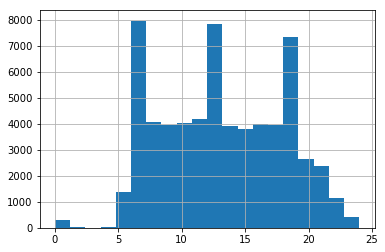

In [201]:
df['DepTime_Hour'].hist(bins=20)

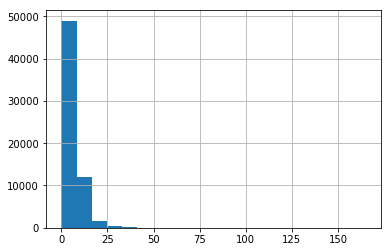

In [202]:
df['TaxiIn'].hist(bins=20)

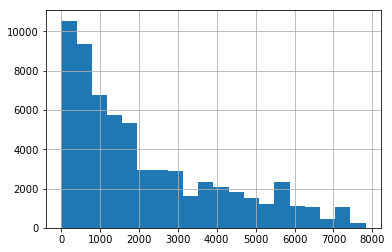

In [203]:
df['FlightNum'].hist(bins=20)

In [204]:
# наконец-то можно выбросить DepTime
df = df.drop(['DepTime_Hour', 'DepTime_Minute'], axis=1)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

<span style="color:blue">Распределения вещественных признаков сильно различаются. Масштабирование позволит привести их к распределению с одинаковым выборочным средним и дисперсией.</span>

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

<span style="color:blue">
Сначала еще раз посмотрим на признаки и оставим только те, которые нам действительно могут пригодиться. Удалим FlightNum, так как он неинформативен. Также удалим те признаки, значения которых становятся известны уже после вылета самолета (их применение в реальной модели бессмысленно, когда самолет уже вылетел, мы уже знаем его задержку и не нужно ее предсказывать). Это признаки ActualElapsedTime, AirTime и Diverted. Признаки Origin и Dest категориальные, но содержат почти 300 уникальных значений. Далее мы будем обучать модель на 1000 объектов, поэтому в ней не стоит использовать 600 dummies (многие примеры даже не попадут в обучающую выборку). В связи с этим удалим Origin и Dest. Значения времени вылета/прилета в минутах не информативны без привязки к часам. Удалим CRSDepTime_Minute, CRSArrTime_Minute.
</span>

In [205]:
df = df.drop(['FlightNum', 'ActualElapsedTime', 'AirTime', 'Diverted', 'Origin', 'Dest', 'CRSDepTime_Minute', 'CRSArrTime_Minute'], axis=1)

In [206]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'CRSElapsedTime',
       'Distance', 'TaxiIn', 'TaxiOut', 'CRSDepTime_Hour', 'CRSArrTime_Hour'],
      dtype='object')

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
def transform_data(data, real, categorical):
    
    for feature in real:        
        vector = list(data[feature])
        for i in range(len(vector)):
            if np.isnan(vector[i]):
                vector[i] = float(0)
            else:
                vector[i] = float(vector[i])
        vector = StandardScaler().fit_transform(np.array(vector).reshape(-1, 1))
        data[feature] = vector
            
    data = pd.get_dummies(data, columns=categorical, dummy_na=True)
    return data


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [209]:
df = transform_data(df, real=['CRSElapsedTime', 'Distance', 'TaxiIn', 'TaxiOut'], \
                     categorical=['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'CRSDepTime_Hour', 'CRSArrTime_Hour'])

In [210]:
print(len(df.columns), 'признаков получено')

129 признаков получено


In [211]:
df.columns

Index(['CRSElapsedTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Month_1.0',
       'Month_2.0', 'Month_3.0', 'Month_4.0', 'Month_5.0', 'Month_6.0',
       ...
       'CRSArrTime_Hour_16.0', 'CRSArrTime_Hour_17.0', 'CRSArrTime_Hour_18.0',
       'CRSArrTime_Hour_19.0', 'CRSArrTime_Hour_20.0', 'CRSArrTime_Hour_21.0',
       'CRSArrTime_Hour_22.0', 'CRSArrTime_Hour_23.0', 'CRSArrTime_Hour_24.0',
       'CRSArrTime_Hour_nan'],
      dtype='object', length=129)

In [212]:
df.head(10)

,CRSElapsedTime,Distance,TaxiIn,TaxiOut,Month_1.0,Month_2.0,Month_3.0,Month_4.0,Month_5.0,Month_6.0,...,CRSArrTime_Hour_16.0,CRSArrTime_Hour_17.0,CRSArrTime_Hour_18.0,CRSArrTime_Hour_19.0,CRSArrTime_Hour_20.0,CRSArrTime_Hour_21.0,CRSArrTime_Hour_22.0,CRSArrTime_Hour_23.0,CRSArrTime_Hour_24.0,CRSArrTime_Hour_nan
0,-0.916899,-0.744211,-0.787245,-0.741383,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.127269,0.183845,-0.582705,-0.389936,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0.370432,0.470891,-0.582705,-0.653522,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.258930,-0.347982,-0.582705,0.225096,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.441950,0.634665,-0.582705,-0.741383,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0.499165,0.525482,-0.378166,-0.302075,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,-0.773862,-0.707230,-0.378166,-0.214213,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.460025,2.673923,0.439994,1.279437,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0.728024,0.602967,-0.582705,-0.917107,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.157134,1.457060,-0.173626,-0.038489,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
# также отмасштабируем целевую переменную
y = StandardScaler().fit_transform(y.values.reshape(-1, 1))

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X = np.array(df)
y = y.ravel()

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=71)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [217]:
from sklearn.linear_model import LinearRegression

In [218]:
linreg = LinearRegression()
linreg.fit(X_train[:1000], y_train[:1000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [219]:
from sklearn.metrics import mean_squared_error, r2_score

In [220]:
print('train_1000: MSE = %s, R^2 = %s' % (mean_squared_error(y_train[:1000], linreg.predict(X_train[:1000])), \
                                          r2_score(y_train[:1000], linreg.predict(X_train[:1000]))))

print('test: MSE = %s, R^2 = %s' % (mean_squared_error(y_test, linreg.predict(X_test)), \
                                          r2_score(y_test, linreg.predict(X_test))))

train_1000: MSE = 0.656210967067, R^2 = 0.209877254015
test: MSE = 4.2573755973e+17, R^2 = -4.37767433929e+17


<span style="color:blue">
На тренировочной подвыборке довольно низкий R^2. На тестовой выборке R^2 отрицательный - среднее значение целевой переменной давало бы лучший результат, чем линейная регрессия. Эта модель не подходит для предсказания целевой переменной.
</span>

In [221]:
linreg.intercept_

36188773546.622269

In [222]:
linreg.coef_

array([  5.86652259e-01,  -5.38398935e-01,   1.79678748e-02,
         3.99224697e-02,   2.98406489e+10,   2.98406489e+10,
         2.98406489e+10,   2.98406489e+10,   2.98406489e+10,
         2.98406489e+10,   2.98406489e+10,   2.98406489e+10,
         2.98406489e+10,   2.98406489e+10,   2.98406489e+10,
         2.98406489e+10,   9.98886431e+08,  -4.85983195e+09,
        -4.85983195e+09,  -4.85983195e+09,  -4.85983195e+09,
        -4.85983195e+09,  -4.85983195e+09,  -4.85983195e+09,
        -4.85983195e+09,  -4.85983195e+09,  -4.85983195e+09,
        -4.85983195e+09,  -4.85983195e+09,  -4.85983195e+09,
        -4.85983195e+09,  -4.85983195e+09,  -4.85983195e+09,
        -4.85983195e+09,  -4.85983195e+09,  -4.85983195e+09,
        -4.85983195e+09,  -4.85983195e+09,  -4.85983195e+09,
        -4.85983195e+09,  -4.85983195e+09,  -4.85983195e+09,
        -4.85983195e+09,  -4.85983195e+09,  -4.85983195e+09,
        -4.85983195e+09,  -4.85983195e+09,  -4.85983195e+09,
         2.78880069e+07,

<span style="color:blue">
Значения большинства коэффициентов очень большие. Также интересно, что значения очень многих коэффициентов совпадают.
</span>

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [223]:
from sklearn.linear_model import LassoCV, RidgeCV

In [224]:
alphagrid = np.linspace(0.001,2,1000)

In [225]:
lasso = LassoCV(alphas=alphagrid, cv=5, random_state=71)
lasso.fit(X_train[:1000], y_train[:1000])

LassoCV(alphas=array([  1.00000e-03,   3.00100e-03, ...,   1.99800e+00,   2.00000e+00]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=71, selection='cyclic', tol=0.0001,
    verbose=False)

In [226]:
lasso.alpha_

0.0070030030030030031

In [228]:
print('train_1000: MSE = %s, R^2 = %s' % (mean_squared_error(y_train[:1000], lasso.predict(X_train[:1000])), \
                                          r2_score(y_train[:1000], lasso.predict(X_train[:1000]))))

print('test: MSE = %s, R^2 = %s' % (mean_squared_error(y_test, lasso.predict(X_test)), \
                                          r2_score(y_test, lasso.predict(X_test))))

train_1000: MSE = 0.719152727629, R^2 = 0.134091082817
test: MSE = 0.953291350229, R^2 = 0.0197719260641


<span style="color:blue">
Результаты на тестовой выборке при использовании Lasso стали лучше.
</span>

In [229]:
alphagrid = np.linspace(10,100,1000)

In [230]:
ridge = RidgeCV(alphas=alphagrid, cv=5)
ridge.fit(X_train[:1000], y_train[:1000])

RidgeCV(alphas=array([  10.     ,   10.09009, ...,   99.90991,  100.     ]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [231]:
ridge.alpha_

76.846846846846844

In [232]:
print('train_1000: MSE = %s, R^2 = %s' % (mean_squared_error(y_train[:1000], ridge.predict(X_train[:1000])), \
                                          r2_score(y_train[:1000], ridge.predict(X_train[:1000]))))

print('test: MSE = %s, R^2 = %s' % (mean_squared_error(y_test, ridge.predict(X_test)), \
                                          r2_score(y_test, ridge.predict(X_test))))

train_1000: MSE = 0.721884990371, R^2 = 0.130801252185
test: MSE = 0.938834917171, R^2 = 0.0346368480303


<span style="color:blue">
Результаты на тестовой выборке при использовании Ridge стали лучше
</span>

In [233]:
lasso.intercept_

-0.077819139277396199

In [234]:
lasso.coef_

array([ 0.05252569, -0.        ,  0.01677318,  0.03791435, -0.        ,
        0.        ,  0.        , -0.10250817,  0.        ,  0.16132647,
        0.04901185,  0.        , -0.1328485 , -0.05910387, -0.03948511,
        0.02329793,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.05873084,
        0.        ,  0.        , -0.        ,  0.        ,  0.05407614,
       -0.        , -0.        , -0.03468235, -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.03990645, -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.00361749,
       -0.        , -0.0571838 , -0.03825912,  0.0117809 , -0.        ,
        0.        ,  0.        , -0.01616532,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.03492229, -0.15

<span style="color:blue">
Lasso осуществляет отбор признаков. Большинстов коэффициентов теперь нулевые. Значения остальных значительно меньше, чем без регуляризации.
</span>

In [235]:
ridge.intercept_

-0.019781209975865875

In [236]:
ridge.coef_

array([ 0.10896881, -0.05747959,  0.019439  ,  0.04514041, -0.02470389,
        0.02630806,  0.0246788 , -0.10250648,  0.01940038,  0.12548284,
        0.06649591,  0.03590795, -0.10312221, -0.07418273, -0.05695161,
        0.06319299,  0.        , -0.00816568, -0.00331169, -0.04207906,
       -0.00407329,  0.00093889,  0.00512006, -0.0263623 ,  0.07961734,
        0.03387779,  0.04312452, -0.00929445,  0.04893393,  0.08529207,
       -0.02845873, -0.0496626 , -0.07520156, -0.01754124,  0.01390868,
        0.0148448 , -0.00806032, -0.05753872,  0.04739621,  0.00887385,
        0.01376048, -0.07347501, -0.05762571,  0.02691906,  0.05145252,
       -0.03743457, -0.03673703,  0.06096178,  0.        ,  0.04479548,
        0.01401115, -0.05721468, -0.05044506,  0.0493833 , -0.01554956,
        0.01501937,  0.        , -0.06847459,  0.0409405 ,  0.        ,
       -0.04061008, -0.05627727,  0.04244655, -0.00932604, -0.02434145,
       -0.04166535, -0.01367029, -0.0363574 ,  0.05987041, -0.12

<span style="color:blue">
При использовании Ridge значения коэффициентов тоже значительно меньше, чем без регуляризации. Некоторые даже обнулились.
</span>

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [237]:
X_train = np.append(X_train, np.array([[1]*len(X_train)]).T, axis=1)
X_test = np.append(X_test, np.array([[1]*len(X_test)]).T, axis=1)

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [238]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X, w)

In [239]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    return np.mean(((y - np.dot(X, w)) / y)**2)

<span style="color:blue">
Перепишем функционал в матричном виде:
</span>

<span style="color:blue">
$$ MSPE(w) = \frac{1}{l}(Y^*(y-Xw))^T(Y^*(y-Xw)), \: где \: Y^* =
\begin{pmatrix}
1/y_1 & 0 &\ldots & 0\\
0 & 1/y_2 &\ldots & 0\\
\vdots& \vdots &\ddots & \vdots\\
0 & 0 &\ldots & 1/y_l
\end{pmatrix}
$$
</span>

<span style="color:blue">
Тогда $ \nabla MSPE(w) = (-\frac{2}{l}(Y^*(y-Xw))^T Y^*X)^T $, $ \nabla MSPE\_L2(w) = (-\frac{2}{l}(Y^*(y-Xw))^T Y^*X + 2w^T)^T $
</span>

In [240]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    return -2 * np.dot((y - np.dot(X, w))/(y**2), X) / len(y)

In [241]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    return np.mean(((y - np.dot(X, w)) / y)**2) + sum(w**2)

In [242]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return -2 * np.dot((y - np.dot(X, w))/(y**2), X) / len(y) + 2*w

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [243]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    if is_reg:
        Q = get_reg_func
        gradient = get_reg_grad
    else:
        Q = get_func
        gradient = get_grad
    
    w_old = w0
    Q_old = Q(w_old, X, y)
    
    Q_values = [Q_old]
    
    for i in range(max_iter):
        w_new = w_old - (step_size*(0.9**(i**0.5))) * gradient(w_old, X, y)
        Q_new = Q(w_new, X, y)
        
        Q_values.append(Q_new)
        
        if sum((w_new - w_old)**2)**0.5 < eps:
            break
        
        w_old = w_new
        Q_old = Q_new
    
    return w_new, Q_values

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

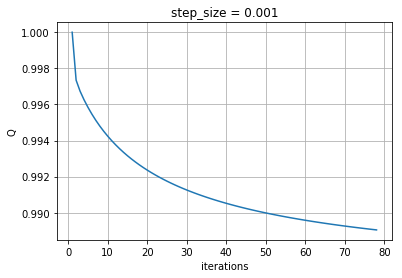

77 итераций. Значение функционала на последней итерации: 0.989049619821


In [245]:
# step_size = 0.001

w, Q = grad_descent(X_train, y_train, np.array([0]*len(X_train[0])), 0.001, 300, 0.0001, False)

plt.plot(range(1, len(Q)+1), Q, '-')
plt.grid(True)
plt.title('step_size = 0.001')
plt.xlabel('iterations')
plt.ylabel('Q')
plt.show()

print(len(Q)-1, 'итераций. Значение функционала на последней итерации:', Q[-1])

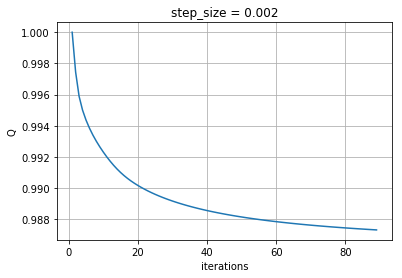

88 итераций. Значение функционала на последней итерации: 0.987331330352


In [246]:
# step_size = 0.002

w, Q = grad_descent(X_train, y_train, np.array([0]*len(X_train[0])), 0.002, 300, 0.0001, False)

plt.plot(range(1, len(Q)+1), Q, '-')
plt.grid(True)
plt.title('step_size = 0.002')
plt.xlabel('iterations')
plt.ylabel('Q')
plt.show()

print(len(Q)-1, 'итераций. Значение функционала на последней итерации:', Q[-1])

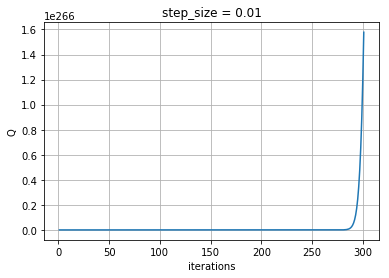

300 итераций. Значение функционала на последней итерации: 1.57796218252e+266


In [247]:
# step_size = 0.01

w, Q = grad_descent(X_train, y_train, np.array([0]*len(X_train[0])), 0.01, 300, 0.0001, False)

plt.plot(range(1, len(Q)+1), Q, '-')
plt.grid(True)
plt.title('step_size = 0.01')
plt.xlabel('iterations')
plt.ylabel('Q')
plt.show()

print(len(Q)-1, 'итераций. Значение функционала на последней итерации:', Q[-1])

<span style="color:blue">
При шаге 0.01 и больше градиентный спуск не сходится
</span>

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

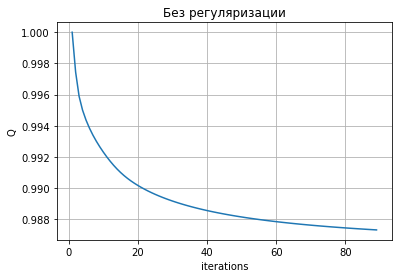

88 итераций. Значение функционала на последней итерации: 0.987331330352


In [265]:
w, Q = grad_descent(X_train, y_train, np.array([0]*len(X_train[0])), 0.002, 300, 0.0001, False)

plt.plot(range(1, len(Q)+1), Q, '-')
plt.grid(True)
plt.title('Без регуляризации')
plt.xlabel('iterations')
plt.ylabel('Q')
plt.show()

print(len(Q)-1, 'итераций. Значение функционала на последней итерации:', Q[-1])

In [266]:
y_predicted = make_pred(X_test, w)
print('Контрольная выборка:')
print('R^2 =', r2_score(y_test, y_predicted))
print('MSE =', mean_squared_error(y_test, y_predicted))
print('MSPE =', np.mean(((y_test - y_predicted) / y_test)**2))

Контрольная выборка:
R^2 = 0.00197879597854
MSE = 0.970595524079
MSPE = 1.00533709567


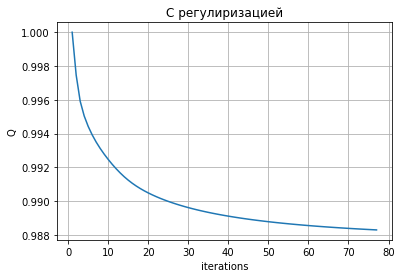

76 итераций. Значение функционала на последней итерации: 0.988294117049


In [267]:
w, Q = grad_descent(X_train, y_train, np.array([0]*len(X_train[0])), 0.002, 300, 0.0001, True)

plt.plot(range(1, len(Q)+1), Q, '-')
plt.grid(True)
plt.title('С регулиризацией')
plt.xlabel('iterations')
plt.ylabel('Q')
plt.show()

print(len(Q)-1, 'итераций. Значение функционала на последней итерации:', Q[-1])

In [268]:
y_predicted = make_pred(X_test, w)
print('Контрольная выборка:')
print('R^2 =', r2_score(y_test, y_predicted))
print('MSE =', mean_squared_error(y_test, y_predicted))
print('MSPE =', np.mean(((y_test - y_predicted) / y_test)**2))

Контрольная выборка:
R^2 = 0.00185080176617
MSE = 0.970720001003
MSPE = 1.00346369748


<span style="color:blue">
С регуляризацией градиентный спуск сходится быстрее, так как подбирает меньше весов (большинство остаются нулевыми).
</span>

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [269]:
import random

In [270]:
def sgd(X, y, w0, step_size, max_iter, eps, is_reg, batch_size):
    if is_reg:
        Q = get_reg_func
        gradient = get_reg_grad
    else:
        Q = get_func
        gradient = get_grad
    
    w_old = w0
    Q_old = Q(w_old, X, y)
    
    Q_values = [Q_old]
    
    for i in range(max_iter):
        random_nums = random.sample(range(len(X)), batch_size)
        w_new = w_old - (step_size*(0.9**(i**0.5))) * gradient(w_old, np.array([X[j] for j in random_nums]), np.array([y[j] for j in random_nums]))
        Q_new = Q(w_new, X, y)
        
        Q_values.append(Q_new)
        
        if sum((w_new - w_old)**2)**0.5 < eps:
            break
        
        w_old = w_new
        Q_old = Q_new
    
    return w_new, Q_values

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

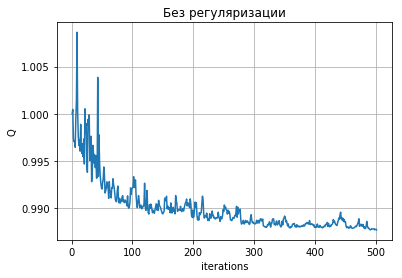

500 итераций. Значение функционала на последней итерации: 0.987666470029


In [271]:
random.seed(42)
w, Q = sgd(X_train, y_train, np.array([0]*len(X_train[0])), 0.001, 500, 0.0001, False, 1000)

plt.plot(range(1, len(Q)+1), Q, '-')
plt.grid(True)
plt.title('Без регуляризации')
plt.xlabel('iterations')
plt.ylabel('Q')
plt.show()

print(len(Q)-1, 'итераций. Значение функционала на последней итерации:', Q[-1])

In [272]:
y_predicted = make_pred(X_test, w)
print('Контрольная выборка:')
print('R^2 =', r2_score(y_test, y_predicted))
print('MSE =', mean_squared_error(y_test, y_predicted))
print('MSPE =', np.mean(((y_test - y_predicted) / y_test)**2))

Контрольная выборка:
R^2 = 0.00201965739076
MSE = 0.970555785541
MSPE = 1.00693449822


**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

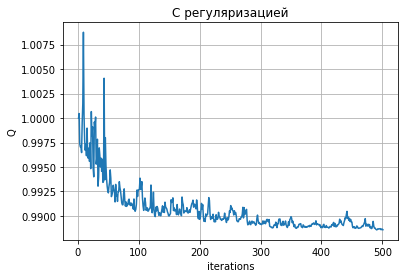

500 итераций. Значение функционала на последней итерации: 0.988589806854


In [273]:
random.seed(42)
w, Q = sgd(X_train, y_train, np.array([0]*len(X_train[0])), 0.001, 500, 0.0001, True, 1000)

plt.plot(range(1, len(Q)+1), Q, '-')
plt.grid(True)
plt.title('С регуляризацией')
plt.xlabel('iterations')
plt.ylabel('Q')
plt.show()

print(len(Q)-1, 'итераций. Значение функционала на последней итерации:', Q[-1])

In [274]:
y_predicted = make_pred(X_test, w)
print('Контрольная выборка:')
print('R^2 =', r2_score(y_test, y_predicted))
print('MSE =', mean_squared_error(y_test, y_predicted))
print('MSPE =', np.mean(((y_test - y_predicted) / y_test)**2))

Контрольная выборка:
R^2 = 0.00191512489823
MSE = 0.970657445474
MSPE = 1.00513401245


<span style="color:blue">
При использовании регуляризации и без нее градиентный спуск не сошелся за 500 итераций, но в обоих случаях находился очень близко к минимуму.
</span>

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [275]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predicted = linreg.predict(X_test)
print('MSPE =', np.mean(((y_test - y_predicted) / y_test)**2))

MSPE = 18.9976485533


<span style="color:blue">
В пункте 17 без регуляризации MSPE был 1.00533709567, что значительно меньше, чем при использовании обычной линейной регрессии. Это объясняется тем, что при обучении обычной линейной регрессии минимизируется другая целевая функция, веса в минимумах MSE и MSPE не совпадают.
</span>